In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [5]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2664,586,France,Male,29,3,0.0,2,1,1,142238.54,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

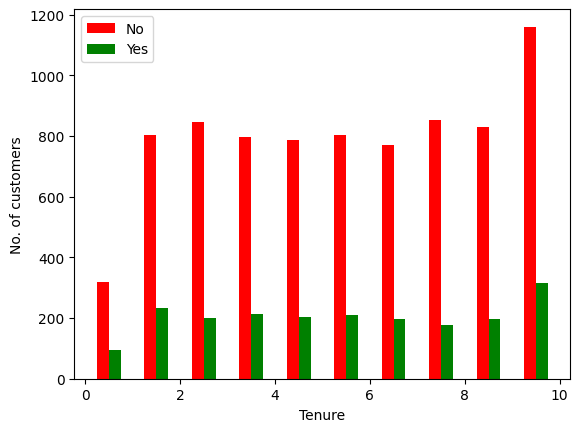

In [8]:
churn_no = df[df.Exited==0].Tenure
churn_yes = df[df.Exited==1].Tenure
plt.hist([churn_no, churn_yes], rwidth=.5, color=['red','green'], label=['No','Yes'])
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.legend()

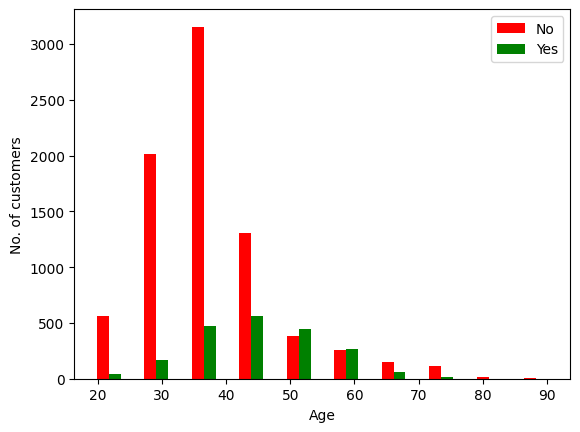

In [9]:
churn_no = df[df.Exited==0].Age
churn_yes = df[df.Exited==1].Age
plt.hist([churn_no, churn_yes], rwidth=.5, color=['red','green'], label=['No','Yes'])
plt.xlabel('Age')
plt.ylabel('No. of customers')
plt.legend()

In [10]:
def unik_col(df):
  for cols in df:
    if df[cols].dtype == 'object':
      print(f'{cols}:{df[cols].unique()}')

In [11]:
unik_col(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


#object to numbers

In [12]:
df['Gender'].replace({'Female':1 ,'Male':0}, inplace=True)

In [13]:
df1= pd.get_dummies(data=df, columns=['Geography'])

In [14]:
df1.sample(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5366,670,1,42,5,49508.79,3,1,1,100324.01,0,False,True,False


In [15]:
df1.drop('Geography_France', axis='columns', inplace=True)

#Scaling

Ab hume karna hai scale... sab columns ko jinki value bhot bhot badi hai... as compared to 0 to 1...

In [16]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [17]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
8735,0.756,0,0.162162,1.0,0.457698,0.000000,0,1,0.188273,0,False,False
9977,0.666,1,0.189189,0.9,0.000000,0.333333,1,1,0.124914,0,False,False
7318,0.564,1,0.189189,0.1,0.000000,0.333333,1,0,0.097580,0,False,True
9315,0.688,0,0.324324,0.8,0.533153,0.000000,1,0,0.181986,0,False,False
2776,0.678,0,0.283784,0.7,0.000000,0.333333,0,0,0.074535,0,False,False
8980,0.600,1,0.229730,0.3,0.661553,0.333333,1,1,0.122365,0,True,False
6479,0.596,0,0.418919,0.5,0.000000,0.000000,1,0,0.749746,1,False,True
5088,0.386,0,0.324324,0.4,0.358069,0.666667,1,0,0.429901,1,False,False
4599,0.582,1,0.270270,0.3,0.000000,0.333333,1,0,0.582329,0,False,False
8179,0.520,1,0.121622,0.9,0.635963,0.000000,0,1,0.516899,0,False,False


In [18]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [19]:
from sklearn.model_selection import train_test_split
X = df1.drop('Exited', axis='columns')
y= df1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
X_train.shape

(8000, 11)

In [21]:
y_test.shape

(2000,)

#ANN

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation = 'relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
X_train = X_train.to_numpy().astype(np.float32)
y_train = y_train.to_numpy().astype(np.int32)

In [26]:
X_test = X_test.to_numpy().astype(np.float32)
y_test = y_test.to_numpy().astype(np.int32)

In [27]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 4ms/step - loss: 0.5126 - accuracy: 0.7955
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4799 - accuracy: 0.7984
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4613 - accuracy: 0.8034
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.8085
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.8138
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8152
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8146
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8181
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.8174
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4227 - accura

In [28]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 6ms/step - loss: 0.3541 - accuracy: 0.8525


[0.35414862632751465, 0.8525000214576721]

In [29]:
y_p = model.predict(X_test)
y_p

63/63 [==============================] - 0s 1ms/step


array([[0.03382253],
       [0.04884531],
       [0.06848881],
       ...,
       [0.01159118],
       [0.00790626],
       [0.04193536]], dtype=float32)

In [30]:
y_pred = []
for y in y_p:
  if y>0.5:
    y_pred.append(1)
  else :
    y_pred.append(0)

In [32]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [33]:
y_test[:5]

array([0, 0, 0, 0, 0], dtype=int32)

#Classification report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.44      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



We can see that the f1 score of 1 label is very low... which is a problem because the samples for that label were very low in the training dataset. A problem called imbalanced dataset


Text(33.22222222222222, 0.5, 'Actual')

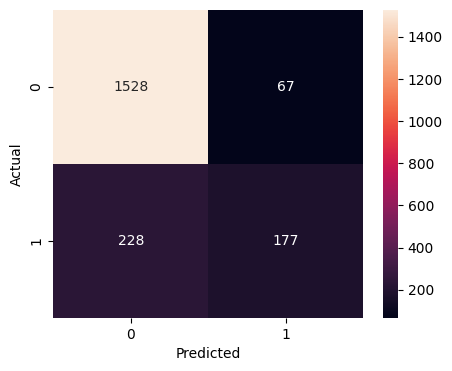

In [36]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
